#### Model HFM

We will focus on 2 key figures:

1) Distribution of respective regions.   
2) Bifurcation diagram using Specific Heat Capacity (Fisher Information) as order parameter

Plotting HFM distributions for n=8...


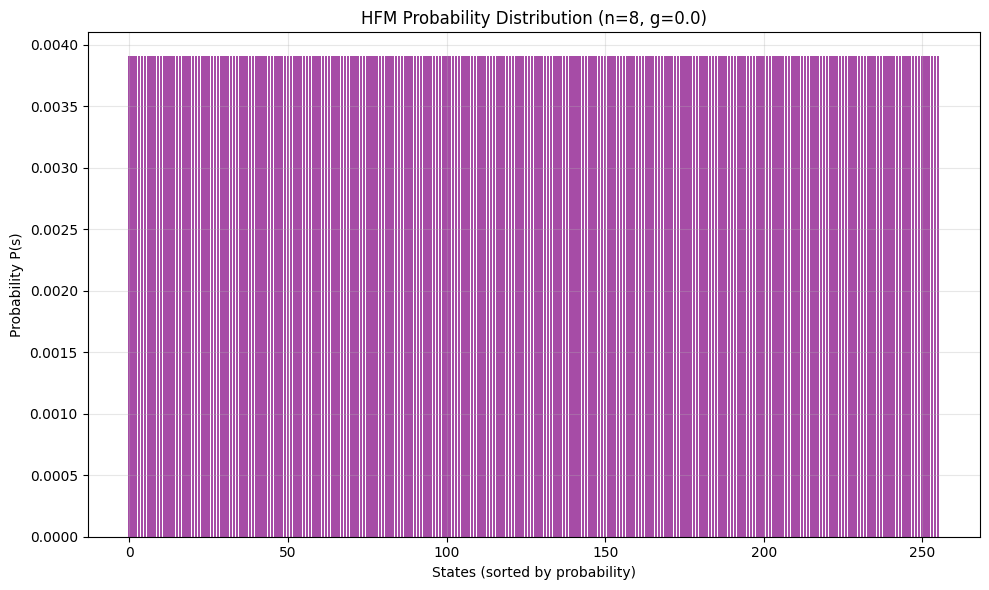

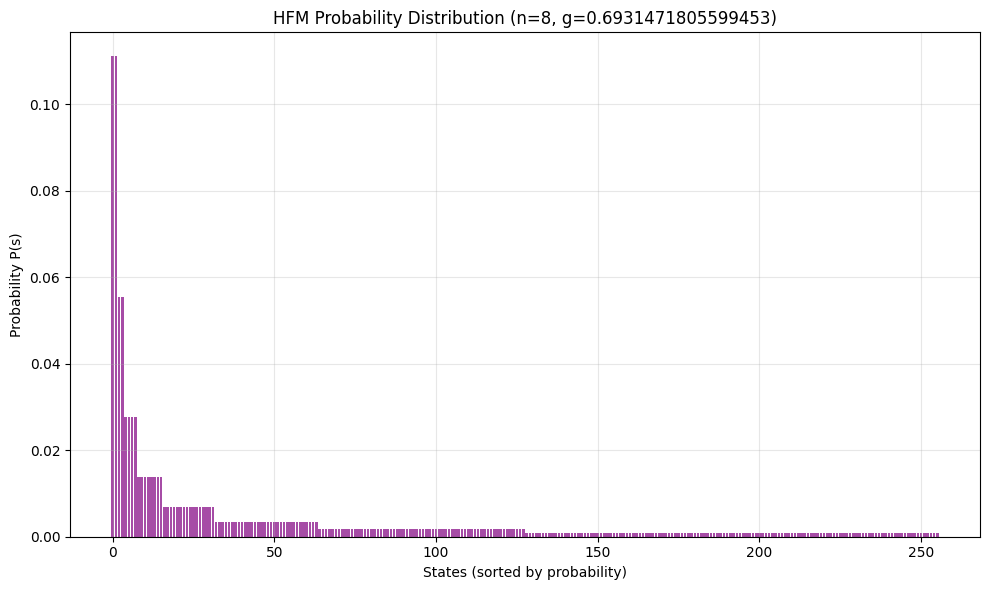

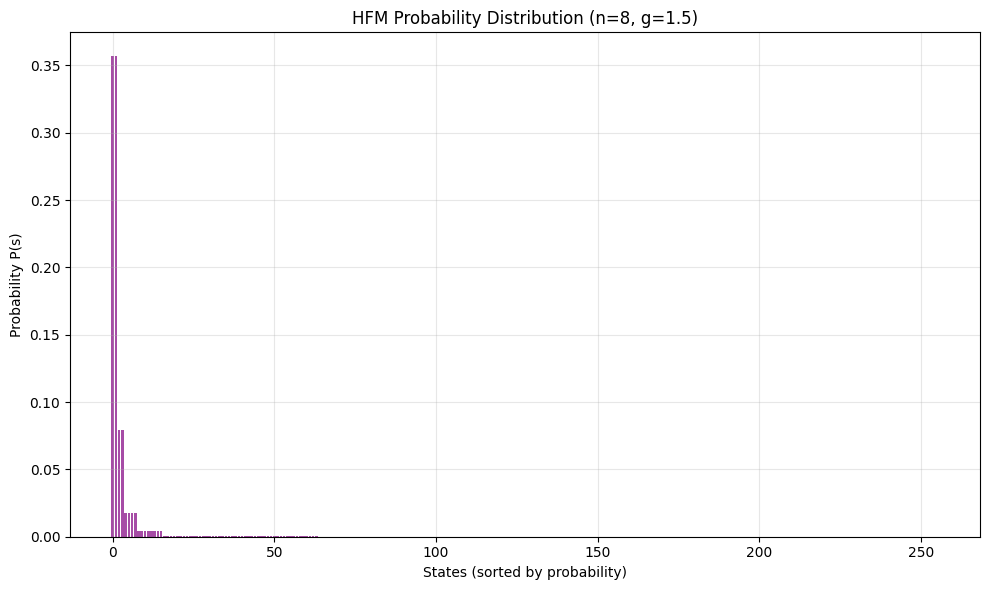

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
def H_model_distribution(n: int, g: float) -> tuple[np.ndarray, np.ndarray]:
    """
    Calculate the probability distribution for the Hierarchical Feature Model (HFM).
    """
    # Generate all possible states in binary representation
    all_states = [np.array([int(x) for x in format(i, f'0{n}b')]) for i in range(2**n)]
    
    # Calculate energies for each state
    # For state (0,0,...,0) -> ms=0
    # For state (1,0,...,0) -> ms=1
    # p(s=(0,0,0))=1
    energies = np.array([
        np.exp(-g * max(np.max(np.where(s == 1)[0] + 1) - 1, 0)) 
        if np.any(s) else 1.0 
        for s in all_states
    ])
    
    # Calculate partition function and probabilities
    Z = np.sum(energies)
    probs = energies / Z
    
    return all_states, probs

def plot_HFM_distribution(n: int, g: float) -> None:
    """
    Plot the probability distribution for the HFM model.
    """
    states, probs = H_model_distribution(n=n, g=g)
    state_labels = [''.join(map(str, s)) for s in states]
    sorted_indices = np.argsort(probs)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(states)), np.array(probs)[sorted_indices], color='purple', alpha=0.7)
    plt.title(f"HFM Probability Distribution (n={n}, g={g})")
    plt.xlabel("States (sorted by probability)")
    plt.ylabel("Probability P(s)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example usage
    print("Plotting HFM distributions for n=8...")
    plot_HFM_distribution(n=8, g=0.0)  # Non-interacting case
    plot_HFM_distribution(n=8, g=np.log(2))  # Critical point 
    plot_HFM_distribution(n=8, g=1.5)  # Interacting case 

Lets use the specific heat as order parameter and plot g vs C by different n:

$
C(g) = \mathbb{E}\left[\left(\mathcal{H}(s) - \mathbb{E}[\mathcal{H}(s)]\right)^2\right]
$



In [7]:
def calculate_hamiltonian(state: np.ndarray) -> float:
    """
    Calculate the Hamiltonian (energy) for a given state.
    
    Args:
        state (np.ndarray): Binary state array
        
    Returns:
        float: Energy of the state
    """
    if not np.any(state):  # state is all zeros
        return 0
    return max(np.max(np.where(state == 1)[0] + 1) - 1, 0)

def calculate_specific_heat(n: int, g: float) -> float:
    """
    Calculate the specific heat C(g) = E[(H-E[H])²] for given n and g. 
    Args:
        n (int): Number of spins
        g (float): Coupling parameter
    Returns:
        float: Specific heat C(g)
    """
    states, probs = H_model_distribution(n, g)
    # Calculate H for each state
    H_values = np.array([calculate_hamiltonian(state) for state in states])
    # Calculate E[H]
    E_H = np.sum(H_values * probs)
    # Calculate E[(H-E[H])²]
    C = np.sum(((H_values - E_H) ** 2) * probs)
    
    return C

def plot_specific_heat(n_values: list[int], g_range: np.ndarray) -> None:
    """
    Plot the specific heat C(g) vs g for different values of n.
    """
    plt.figure(figsize=(10, 6))
    
    for n in n_values:
        C_values = [calculate_specific_heat(n, g) for g in g_range]
        plt.plot(g_range, C_values, label=f'n={n}', linewidth=2)
    # Add vertical line at g_c = log(2)
    g_c = np.log(2)
    plt.axvline(x=g_c, color='r', linestyle='--', label='Critical point g=log(2)')
    plt.title('Phase Transition: Specific Heat vs Coupling Strength')
    plt.xlabel('Coupling strength (g)')
    plt.ylabel('Specific Heat C(g)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

Plotting specific heat C(g) for different n values


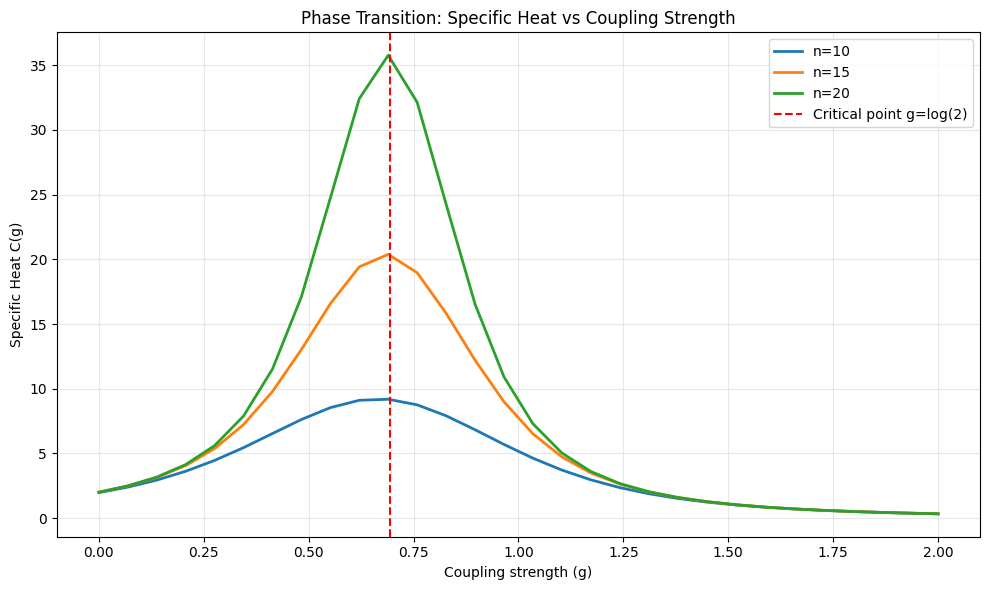

In [ ]:
g_range = np.linspace(0.0, 2, 30)
n_values = [10, 15, 20]
print("Plotting specific heat C(g) for different n values")
plot_specific_heat(n_values, g_range) 